# This File is to look at rider behaviour for those picked up from JFK Airport

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read the lyft_Dec_23.parquet file into a DataFrame.
lyft_df = pd.read_parquet("lyft_Dec_23.parquet")

# Display the first 5 rows of the DataFrame.
lyft_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
0,2023-12-01 00:00:00,2023-12-01 00:25:06,130,216,3.882,1506,14.17,0.00,0.39,1.26,0.00,0.0,10.0,19.43,25.82
1,2023-12-01 00:00:00,2023-12-01 00:25:31,170,61,8.530,1531,37.25,2.24,1.08,3.48,2.75,0.0,0.0,25.80,46.80
2,2023-12-01 00:00:00,2023-12-01 01:05:08,158,265,18.970,3908,59.29,22.44,2.25,0.00,0.00,0.0,0.0,67.70,83.98
3,2023-12-01 00:00:01,2023-12-01 00:19:44,238,185,10.432,1183,28.39,0.24,0.79,2.54,2.75,0.0,0.0,25.00,34.71
4,2023-12-01 00:00:01,2023-12-01 00:22:25,216,61,9.309,1344,29.56,0.00,0.81,2.62,0.00,0.0,0.0,25.05,32.99


In [4]:
lyft_df.set_index("pickup_datetime", inplace=True, drop=False)  
lyft_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
pickup_datetime,,,,,,,,,,,,,,,
2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 00:25:06,130,216,3.882,1506,14.17,0.00,0.39,1.26,0.00,0.0,10.0,19.43,25.82
2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 00:25:31,170,61,8.530,1531,37.25,2.24,1.08,3.48,2.75,0.0,0.0,25.80,46.80
2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 01:05:08,158,265,18.970,3908,59.29,22.44,2.25,0.00,0.00,0.0,0.0,67.70,83.98
2023-12-01 00:00:01,2023-12-01 00:00:01,2023-12-01 00:19:44,238,185,10.432,1183,28.39,0.24,0.79,2.54,2.75,0.0,0.0,25.00,34.71
2023-12-01 00:00:01,2023-12-01 00:00:01,2023-12-01 00:22:25,216,61,9.309,1344,29.56,0.00,0.81,2.62,0.00,0.0,0.0,25.05,32.99


In [5]:
from Util import merge_with_taxi_data

# Merge the lyft data with the taxi data.
lyft_locations_df = merge_with_taxi_data(lyft_df)
lyft_locations_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,Pickup_Borough,Pickup_Zone,DOLocationID,Dropoff_Borough,Dropoff_Zone,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
0,2023-12-01 00:00:00,2023-12-01 00:25:06,130,Queens,Jamaica,216,Queens,South Ozone Park,3.882,1506,14.17,0.00,0.39,1.26,0.00,0.0,10.0,19.43,25.82
1,2023-12-01 00:00:00,2023-12-01 00:25:31,170,Manhattan,Murray Hill,61,Brooklyn,Crown Heights North,8.530,1531,37.25,2.24,1.08,3.48,2.75,0.0,0.0,25.80,46.80
2,2023-12-01 00:00:00,2023-12-01 01:05:08,158,Manhattan,Meatpacking/West Village West,265,NaN,Outside of NYC,18.970,3908,59.29,22.44,2.25,0.00,0.00,0.0,0.0,67.70,83.98
3,2023-12-01 00:00:01,2023-12-01 00:19:44,238,Manhattan,Upper West Side North,185,Bronx,Pelham Parkway,10.432,1183,28.39,0.24,0.79,2.54,2.75,0.0,0.0,25.00,34.71
4,2023-12-01 00:00:01,2023-12-01 00:22:25,216,Queens,South Ozone Park,61,Brooklyn,Crown Heights North,9.309,1344,29.56,0.00,0.81,2.62,0.00,0.0,0.0,25.05,32.99


# Prep Work Complete (from Common_Trends.ipynb) - Now to Analyize JFK

In [6]:
#Filter to just JFK pickups 
jfk_df = lyft_locations_df[(lyft_locations_df['PULocationID'] == 132) & (lyft_locations_df['airport_fee'] > 0 )]

jfk_df.set_index("pickup_datetime", inplace=True, drop=False)  

jfk_df.info()
jfk_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93847 entries, 2023-12-01 00:00:15 to 2023-12-31 23:59:36
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   pickup_datetime       93847 non-null  datetime64[us]
 1   dropoff_datetime      93847 non-null  datetime64[us]
 2   PULocationID          93847 non-null  int32         
 3   Pickup_Borough        93847 non-null  object        
 4   Pickup_Zone           93847 non-null  object        
 5   DOLocationID          93847 non-null  int32         
 6   Dropoff_Borough       78058 non-null  object        
 7   Dropoff_Zone          93847 non-null  object        
 8   trip_miles            93847 non-null  float64       
 9   trip_time             93847 non-null  int64         
 10  base_passenger_fare   93847 non-null  float64       
 11  tolls                 93847 non-null  float64       
 12  bcf                   93847 non-null  f

,pickup_datetime,dropoff_datetime,PULocationID,Pickup_Borough,Pickup_Zone,DOLocationID,Dropoff_Borough,Dropoff_Zone,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
pickup_datetime,,,,,,,,,,,,,,,,,,,
2023-12-01 00:00:15,2023-12-01 00:00:15,2023-12-01 00:31:46,132,Queens,JFK Airport,256,Brooklyn,Williamsburg (South Side),18.315,1891,45.89,0.00,1.26,4.06,0.00,2.5,0.00,42.13,53.71
2023-12-01 00:00:25,2023-12-01 00:00:25,2023-12-01 00:45:30,132,Queens,JFK Airport,265,NaN,Outside of NYC,36.487,2705,103.48,27.14,3.66,0.00,0.00,2.5,0.00,73.86,136.78
2023-12-01 00:01:00,2023-12-01 00:01:00,2023-12-01 00:10:47,132,Queens,JFK Airport,132,Queens,JFK Airport,1.889,587,9.84,0.00,0.32,1.03,0.00,2.5,0.00,8.07,13.69
2023-12-01 00:01:31,2023-12-01 00:01:31,2023-12-01 00:10:59,132,Queens,JFK Airport,132,Queens,JFK Airport,3.613,568,18.01,0.00,0.56,1.82,0.00,2.5,0.00,10.16,22.89
2023-12-01 00:01:40,2023-12-01 00:01:40,2023-12-01 00:30:52,132,Queens,JFK Airport,170,Manhattan,Murray Hill,16.942,1752,48.76,6.14,1.58,5.09,2.75,2.5,13.36,39.01,80.18


Text(0, 0.5, 'Number of Trips')

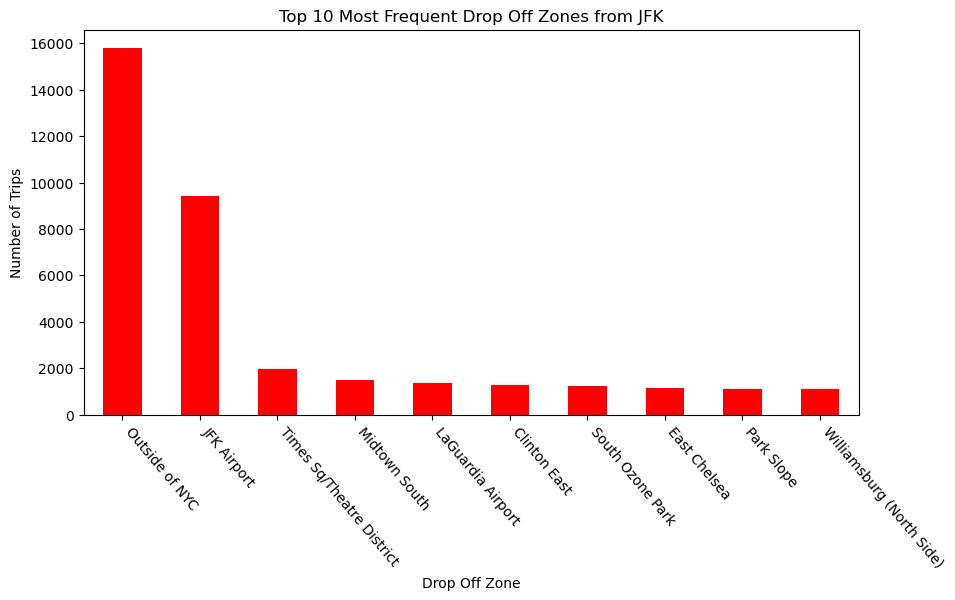

In [7]:
# Plot the top 10 most frequent dropoff zones.
jfk_df["Dropoff_Zone"].value_counts().head(10).plot(kind="bar", title="Top 10 Most Frequent Drop Off Zones from JFK", figsize=(10, 5), color='red')
plt.xticks(rotation=310, ha="left")
plt.xlabel("Drop Off Zone")
plt.ylabel("Number of Trips")

Text(0, 0.5, 'Number of Trips')

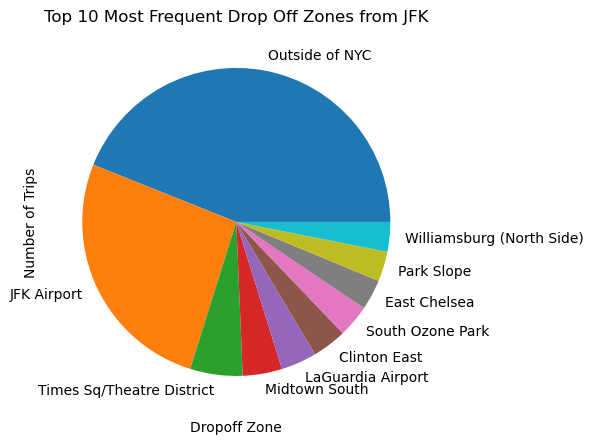

In [8]:
jfk_df["Dropoff_Zone"].value_counts().head(10).plot(kind="pie", title="Top 10 Most Frequent Drop Off Zones from JFK", figsize=(10, 5))
plt.xticks(rotation=310, ha="left")
plt.xlabel("Dropoff Zone")
plt.ylabel("Number of Trips")

Text(0, 0.5, 'Miles')

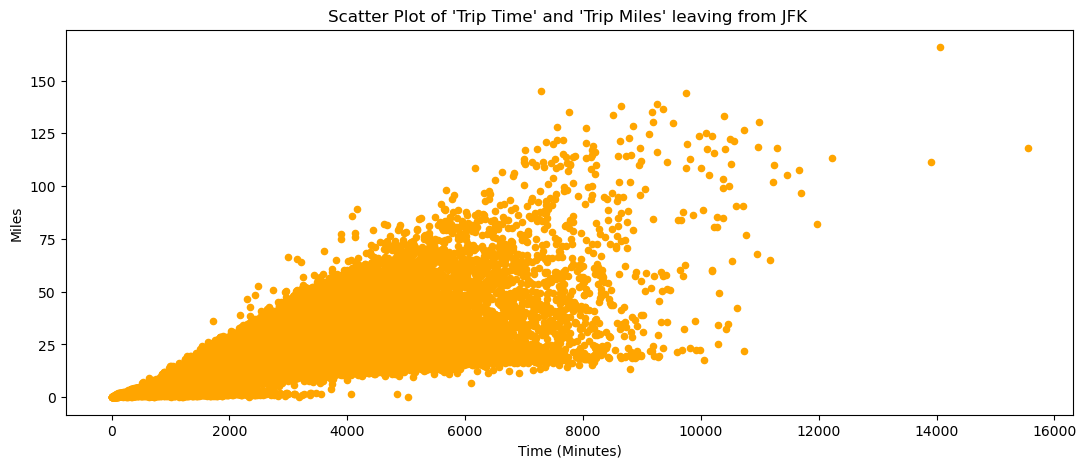

In [9]:
# scatter plot for trip time and trip miles
jfk_df.plot.scatter(x="trip_time", y="trip_miles", figsize=(13, 5), color="orange") 
plt.title("Scatter Plot of 'Trip Time' and 'Trip Miles' leaving from JFK ")
plt.xlabel("Time (Minutes)")
plt.ylabel("Miles")

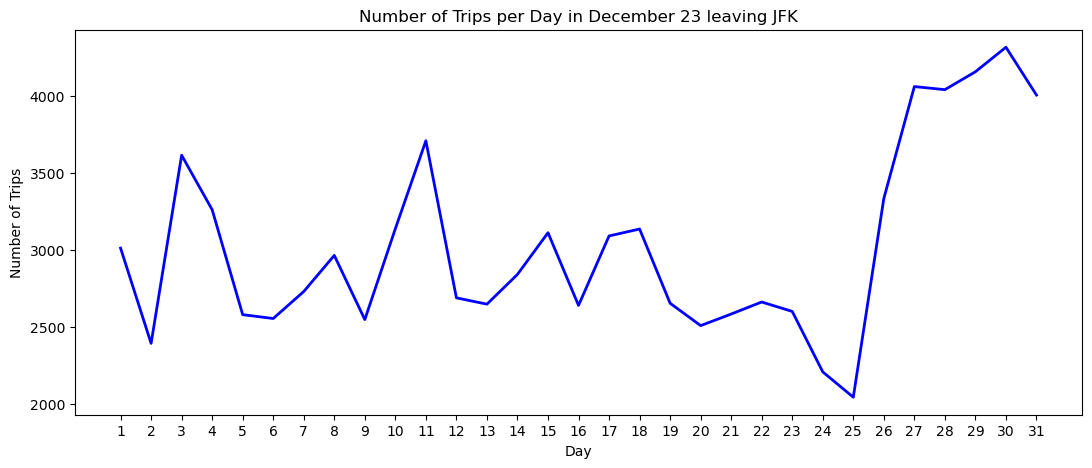

In [10]:
jfk_df["DOLocationID"].groupby(jfk_df.index.day).count().plot(figsize=(13, 5), color="blue", linewidth=2)
plt.title("Number of Trips per Day in December 23 leaving JFK")
plt.xlabel("Day")
plt.xticks(np.arange(1, 32, 1))
plt.ylabel("Number of Trips")
plt.show()

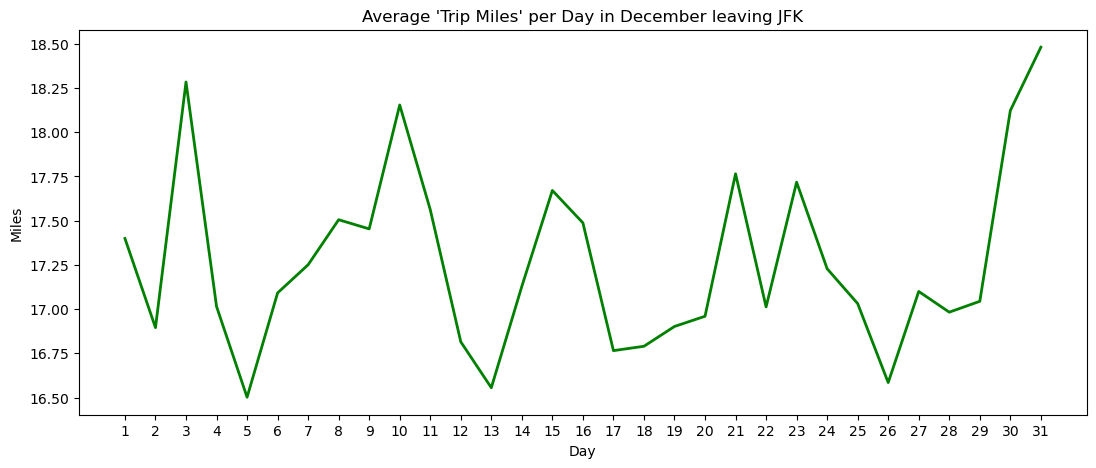

In [11]:
jfk_df.groupby(jfk_df.index.day)["trip_miles"].mean().plot(figsize=(13, 5), color="green", linewidth=2)
plt.title("Average 'Trip Miles' per Day in December leaving JFK")
plt.xlabel("Day")
plt.ylabel("Miles")
plt.xticks(np.arange(1, 32, 1))
plt.show()

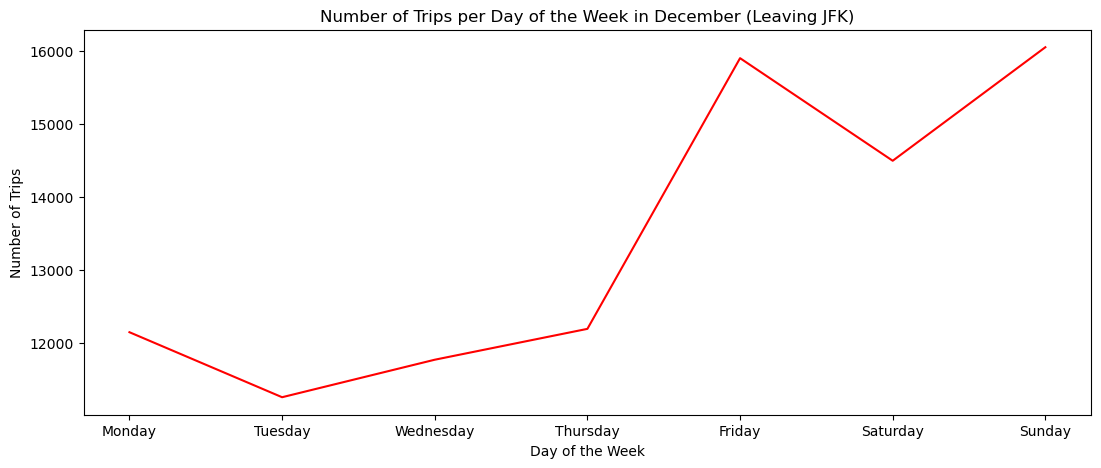

In [12]:
jfk_df.groupby(jfk_df.index.dayofweek)["trip_time"].count().plot(figsize=(13, 5), color="red")
plt.title("Number of Trips per Day of the Week in December (Leaving JFK)")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.xticks(np.arange(0, 7, 1), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

In [13]:
jfk_mean_values = jfk_df[['trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'tips','driver_pay','Total_Passenger_Cost']].mean()
jfk_mean_values

trip_miles                17.301518
trip_time               2592.416316
base_passenger_fare       60.444369
tolls                      3.596906
tips                       4.039811
driver_pay                49.972996
Total_Passenger_Cost      77.903079
dtype: float64